# Python

Python est un langage de programmation très réputé pour l'écriture et la manipulation de structures de données.

Comme tout langage de programmation, Python possède un vocabulaire (des mots clés) et des règles de grammaire (comment agencer les mots clés).

### Variables ###

In [ ]:
var = 12
print(var)

12


In [ ]:
var = var + 12
# var += 12

print(var)

24


#### Listes et dictionnaires  ####

Les listes sont un regroupement de variables dans une même variable, chaque valeur est accessible via un index.    
Les dictionnaires ont le même principe mais pour chaque valeur une clé y est attribuée.

Il existe d'autres formes de structure de données mais ces deux là sont les plus utilisées.

*Quelques exemples*

In [ ]:
liste = [12, 24, 36, 48]

dico = {
    "Jean": "018443",
    "Alain Turing": "018345",
    "Ada Lovelace": "018333",
    "Administrator": {"0001", "018774"}
}

In [ ]:
print('liste : ', liste)

print('Le 1er élément de la liste :', liste[0])
print('Le 2ème élément de la liste :', liste[1])

liste :  [12, 24, 36, 48]
Le 1er élément de la liste : 12
Le 2ème élément de la liste : 24


In [ ]:
liste.append(60)

print('liste : ', liste)

liste :  [12, 24, 36, 48, 60]


### Boucles While et For ###

Les boucles permettent de réaliser une certaine action n fois ou tant qu'une certaine condition n'est pas ou est vérifiéé.

In [ ]:
var = 0

while var < 48:
    var += 12 # var = var + 12
    print("var = ", var)

var =  12
var =  24
var =  36
var =  48


In [ ]:
dico = {
    "Jean": "018443",
    "Alain Turing": "018345",
    "Ada Lovelace": "018333",
    "Administrator": {"0001", "018774"}
}

In [ ]:
dico["Jean"] = "NULL"

for key in dico:
    print(key, ' : ', dico[key])


Jean  :  NULL
Alain Turing  :  018345
Ada Lovelace  :  018333
Administrator  :  {'0001', '018774'}


### Structures Conditionnelles ###

Pour effectuer un bloc d'instructions si une condition est vraie, on utilise le mot-clé if.

Si la condition est vraie, on exécute les instructions du blocs. Sinon on saute le bloc. On peut ajouter un bloc à exécuter seulement si la condition est fausse.

In [ ]:
var = int(input("valeur : "))

if var == 10:
    print("var est égal à 10\nvar = ", var)
elif var < 10:
    print("var est inférieur à 10\nvar = ", var)
else:
    print("var est supérieur à 10 \nvar = ", var)

valeur : 9
var est inférieur à 10
var =  9


### Fonctions ###

Une fonction est un bout de code que l'on va définir afin d'être réutilisé.   
Une des premières utilité d'une fonction est donc de rendre le problème plus simple a résoudre en le découpant en sous problèmes.   
Cela a aussi l'avantage de rendre le code plus lisible en le découpant et en nommant les actions.

In [ ]:
def drawSquare(x):
    for i in range(x):
        print('*' * x)

drawSquare(5)

*****
*****
*****
*****
*****


In [ ]:
x = int(input("Carré de taille : "))

drawSquare(x)

Carré de taille : 3
***
***
***


In [ ]:
def function(dico):
    for x in dico:
        print(x, ' : ', dico[x])
        
function(dico)

Jean  :  NULL
Alain Turing  :  018345
Ada Lovelace  :  018333
Administrator  :  {'0001', '018774'}


### Librairies (c'est pas fini)

Un **package**, aussi appelé **librairie**, est une collection, un ensemble de fichiers Python. Un package est simplement un dossier contenant plusieurs fichiers Python (.py).  
Il existe un grand nombre de librairies, nous allons en voir quelques unes ci-dessous, mais elles ne représentent qu'une **infime partie** de ce qui est disponible.

In [16]:
!pip install pendulum
import pendulum

now = pendulum.now()
now = now.to_day_datetime_string()

print(now)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 155 kB 4.3 MB/s 
     |████████████████████████████████| 489 kB 35.1 MB/s 
Tue, Jun 28, 2022 1:27 PM


In [ ]:
import pandas as pd
import math

dataFrame = pd.read_csv("rsc/petrol_dataset.csv", sep=",", encoding = 'latin-1')
del dataFrame['#']
dataFrame

FileNotFoundError: ignored

In [ ]:
dataFrame["World Share"] = dataFrame['World Share'].str.replace('%','', regex = False)
dataFrame["World Share"] = pd.to_numeric(dataFrame['World Share']).astype(float)

In [ ]:
dfSupOnePercent = dataFrame[dataFrame['World Share'] >= 1]
dfSubOnePercent = dataFrame[dataFrame['World Share'] < 1]

worldShareSum = dfSubOnePercent['World Share'].sum()
dailyOilConsumptionSum = dfSupOnePercent['Daily Oil Consumption (Barrels)'].sum()
yearlyGallonConsumptionSum = math.trunc(dfSupOnePercent['Yearly Gallons Per Capita'].sum())

print(f"Other Countries (≈160) :\n\tWorld Share : {worldShareSum}\n\tDaily Oil Consumption (Barrels) : {dailyOilConsumptionSum}\n\tYearly Gallons Per Capita : {yearlyGallonConsumptionSum}")

Other Countries (≈160) :
	World Share : 20.91
	Daily Oil Consumption (Barrels) : 76256706
	Yearly Gallons Per Capita : 14588


In [ ]:
mod_df = dfSupOnePercent.append({ "Country" : 'Other',
                                  "World Share" : worldShareSum,
                                  "Daily Oil Consumption (Barrels)" : dailyOilConsumptionSum,
                                  "Yearly Gallons Per Capita" : yearlyGallonConsumptionSum},
                                  ignore_index=True)

mod_df.sort_values(by=['Daily Oil Consumption (Barrels)'], inplace=True, ascending=False)
mod_df

D:\TEMP\ipykernel_21328\4003581031.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mod_df = dfSupOnePercent.append({ "Country" : 'Other',


,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
23,Other,76256706,20.91,14588.0,NaN,NaN,NaN
0,United States,19687287,20.30,934.3,5.19,1.37,289.97
1,China,12791553,13.20,138.7,5.42,1.43,302.87
2,India,4443000,4.60,51.4,5.05,1.33,281.93
3,Japan,4012877,4.10,481.5,4.69,1.24,262.05
4,Russia,3631287,3.70,383.2,3.41,0.90,190.56
5,Saudi Arabia,3302000,3.40,1560.2,2.35,0.62,131.34
6,Brazil,2984000,3.10,221.9,5.36,1.42,299.27
7,South Korea,2605440,2.70,783.4,6.09,1.61,340.52
8,Canada,2486301,2.60,1047.6,6.76,1.79,377.74


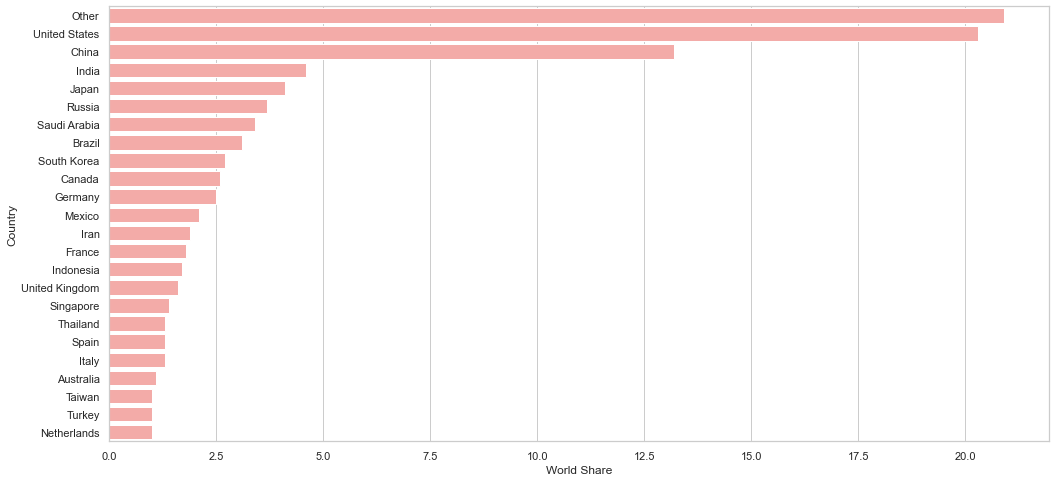

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))

sns.set_color_codes("pastel")
ax = sns.barplot(x = "World Share", y = "Country", data = mod_df, color = "r")

plt.show()